<div style="text-align: center; padding: 20px; background-color: #f7f9fc; border-radius: 10px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">
    <h1 style="font-family: 'Georgia', serif; font-size: 2.0em; color: #34495e; margin-bottom: 0;">
        Comprehensive Analysis of CNN, VGG16, VGG19, DenseNet121, and DenseNet169
    </h1>
    <h2 style="font-family: 'Georgia', serif; font-size: 1.5em; color: #2980b9; margin-top: 0;">
        for Pneumonia Detection from Chest X-ray Images
    </h2>
</div>


<h1 style="font-family: 'poppins'; font-weight: bold; color: red;">👨‍💻Author: Muhammad Zeeshan</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/zeeshan-ayaz?tab=repositories)

[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/zeeshanayaz)

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammad-zeeshan-ayaz/)



### **Project Overview**
This project focuses on detecting pneumonia from chest X-ray images using five different Convolutional Neural Network (CNN) architectures: a custom CNN, VGG16, VGG19, DenseNet121, and DenseNet169. The dataset contains X-ray images categorized into two classes: "NORMAL" and "PNEUMONIA." The models are trained on this labeled data to predict whether a given X-ray image shows signs of pneumonia. The goal is to compare the performance of these models to determine which one is most effective in identifying pneumonia from medical images.

### **Models Used**

1. **Custom CNN (Convolutional Neural Network):**
   - **Architecture**: A simple yet powerful CNN model built from scratch. It includes several convolutional layers followed by pooling layers, culminating in fully connected layers for classification.
   - **Purpose**: To serve as a baseline model for comparison with more complex, pre-trained networks like VGG16, VGG19, DenseNet121, and DenseNet169.

2. **VGG16:**
   - **Architecture**: VGG16 is a well-known pre-trained CNN architecture that is deeper and more sophisticated than the custom CNN. It consists of 16 layers with small (3x3) convolutional filters and is widely used for image classification tasks.
   - **Transfer Learning**: The model is fine-tuned on the chest X-ray dataset by adjusting the last few layers, allowing it to leverage the features learned from a large image dataset.

3. **VGG19:**
   - **Architecture**: Similar to VGG16 but with 19 layers, VGG19 is even deeper and potentially more capable of capturing complex features in images.
   - **Transfer Learning**: Like VGG16, VGG19 is fine-tuned on the pneumonia detection task, providing a comparison point with VGG16 and the custom CNN.

4. **DenseNet121:**
   - **Architecture**: DenseNet121 is a pre-trained CNN architecture known for its dense connections between layers, allowing for efficient gradient flow and improved learning. It has 121 layers, making it highly effective for complex image classification tasks.
   - **Transfer Learning**: This model is also fine-tuned on the chest X-ray dataset to leverage its deep architecture for pneumonia detection.

5. **DenseNet169:**
   - **Architecture**: Similar to DenseNet121, DenseNet169 is another dense CNN model, but with 169 layers, offering even greater depth and potential for capturing intricate features in the images.
   - **Transfer Learning**: Fine-tuned on the chest X-ray dataset, DenseNet169 provides an additional point of comparison with the other models in this study.

### **Objective**

The primary objective of this project is to:
- Compare the performance of the custom CNN, VGG16, VGG19, DenseNet121, and DenseNet169 models in detecting pneumonia from chest X-ray images.
- Evaluate each model's accuracy, precision, recall, and overall effectiveness.
- Determine the most suitable model for deployment in a clinical setting.


### 1. Importing Libraries and Mounting Google Drive

In [ ]:

from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


### 2. Setting Up the Directory Structure

Define the directory path where the chest X-ray dataset is stored in Google Drive.
The dataset is organized into folders: 'train', 'test', and 'val', with subfolders for each label: 'NORMAL' and 'PNEUMONIA'.


In [ ]:
#
main_directory = '/content/drive/MyDrive/chest_xray'


labels = ['NORMAL', 'PNEUMONIA']
folders = ['train', 'test', 'val']


### 3. Loading Images from 
This function loads images from the specified directory, resizes them to 150x150 pixels, and labels them based on their folder ('NORMAL' or 'PNEUMONIA').
It returns the images and their corresponding labels, shuffled to ensure randomness during training.



In [ ]:

# Function to load images from a specified directory based on labels
def load_images_from_directory(main_directory, foldername):
    total_labels = []
    images = []
    total_normal = 0
    total_pneumonia = 0
    path = os.path.join(main_directory, foldername)

    # Loop through each label (e.g., 'NORMAL', 'PNEUMONIA')
    for lab in labels:
        full_path = os.path.join(path, lab)
        print('loading ....... images of folder:', foldername+'/'+lab)

        # Loop through each image in the label's directory
        for image in os.listdir(full_path):
            img = cv2.imread(os.path.join(full_path, image))
            img = cv2.resize(img, (150, 150))
            images.append(img)

            # Assign label (0 for 'NORMAL', 1 for 'PNEUMONIA')
            if lab == 'NORMAL':
                label = 0
                total_normal += 1
            elif lab == 'PNEUMONIA':
                label = 1
                total_pneumonia += 1
            total_labels.append(label)

    # Display total counts for 'NORMAL' and 'PNEUMONIA' images
    print('total normal image :=', total_normal)
    print('total Pneumonia    :=', total_pneumonia)

    # Shuffle and return images and labels
    return shuffle(images, total_labels, random_state=756349782)


### 4. Helper Functions for Label Mapping and Plotting

get_Label: This function maps the numeric label (0 or 1) back to the respective class name ('NORMAL' or 'PNEUMONIA').\
plot_predictions: This function is used to plot images with their predicted labels for visualization purposes.


In [ ]:

# Function to get label name based on the given number (0 or 1)
def get_Label(number):
    labels = {0: 'NORMAL', 1: 'PNEUMONIA'}
    return labels[number]

# Function to plot predictions using a trained model
def plot_prediction(model_name, val_images, val_labels):
    plt.figure(figsize=(20, 15))
    plt.suptitle("Prediction Images", fontsize=20)
    count = 0

    # Loop through validation images
    for i, files in enumerate(val_images):
        plt.subplot(5, 6, i + 1)
        plt.imshow(files, cmap=plt.cm.binary)

        # Preprocess the image and make predictions
        img = cv2.resize(files, (150, 150))
        img = np.expand_dims(files, axis=0)
        feature = model_name.predict(img)
        prediction = np.argmax(feature, axis=1)

        # Display prediction and true label
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel("Predicted " + get_Label(int(prediction)))
        plt.ylabel(get_Label(val_labels[i]))
        count += 1

        # Display up to 30 images
        if count == 30:
            break

    # Show the plot
    plt.show()

# Function to freeze layers of a given model
def freezing_layers(model_name):
    for layer in model_name.layers:
        layer.trainable = False

### 5. Importing Libraries for Model Building

This section imports TensorFlow and Keras for building the CNN, as well as the necessary layers and model-building tools.



In [ ]:
# Core libraries
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import seaborn as sns  # Importing Seaborn for statistical data visualization
import glob  # Importing glob for file/path pattern matching
import random  # Importing random for generating random numbers
import os  # Importing os for interacting with the operating system
import cv2  # Importing OpenCV for image and video processing

# Tensorflow & Keras
import tensorflow as tf  # Importing TensorFlow, an open-source machine learning framework
from tensorflow import keras  # Importing Keras, a high-level neural networks API running on top of TensorFlow
from keras.regularizers import l2  # Importing L2 regularization for Keras layers
from sklearn.utils import shuffle  # Importing shuffle for shuffling data
from tensorflow.keras.utils import to_categorical  # Importing to_categorical for converting class vectors to binary class matrices
from keras.models import load_model  # Importing load_model to load pre-trained Keras models
from tensorflow.keras import Sequential  # Importing Sequential for creating sequential neural network models
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout, Input  # Importing various layers for model architecture
from keras.models import Sequential, Model  # Importing Sequential and Model for creating neural network models
from keras.layers import Conv2D, GlobalMaxPooling2D  # Importing convolutional layers for CNN architectures
from tensorflow.keras.applications import Xception, VGG16, InceptionResNetV2  # Importing pre-trained models from Keras applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importing ImageDataGenerator for data augmentation

# CNN
from tensorflow.keras import datasets, layers, models  # Importing modules for building convolutional neural networks
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda  # Importing layers for building neural network architectures
from tensorflow.keras.models import Sequential  # Importing Sequential for creating sequential neural network models

# If you need to define a custom layer
class MyCustomLayer(tf.keras.layers.Layer):
    def __init__(self, units=32, **kwargs):
        super(MyCustomLayer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        # Your layer implementation here
        pass

    def call(self, inputs):
        # Your layer logic here
        pass

# Importing scikit-learn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

### 6. Loading and Preprocessing the Data

Load training, validation, and test images along with their corresponding labels using the defined function.\
Convert the images to NumPy arrays and normalize their pixel values to be between 0 and 1 for better model performance.


In [ ]:
# Load training images and labels using the defined function
train_images, train_labels = load_images_from_directory(main_directory, 'train')

# Load validation images and labels using the defined function
val_images, val_labels = load_images_from_directory(main_directory, 'val')

# Load test images and labels using the defined function
test_images, test_labels = load_images_from_directory(main_directory, 'test')


loading ....... images of folder: train/NORMAL
loading ....... images of folder: train/PNEUMONIA
total normal image := 1341
total Pneumonia    := 3875
loading ....... images of folder: val/NORMAL
loading ....... images of folder: val/PNEUMONIA
total normal image := 8
total Pneumonia    := 8
loading ....... images of folder: test/NORMAL
loading ....... images of folder: test/PNEUMONIA
total normal image := 234
total Pneumonia    := 390


In [ ]:
# Convert the list of training images to a NumPy array and normalize pixel values
train_images = np.asarray(train_images, np.float32) / 255

# Convert the list of training labels to a NumPy array
train_labels = np.asarray(train_labels)


In [ ]:
# Print the shape of the training images array
print('train Images shape is   : ', train_images.shape)

# Print the shape of the training labels array
print('train Labels shape is   : ', train_labels.shape)


train Images shape is   :  (5216, 150, 150, 3)
train Labels shape is   :  (5216,)


In [ ]:
# Convert the list of test images to a NumPy array and normalize pixel values
test_images = np.asarray(test_images, np.float32) / 255

# Convert the list of test labels to a NumPy array
test_labels = np.asarray(test_labels)


In [ ]:
# Print the shape of the test images array
print('test Images shape is   : ', test_images.shape)

# Print the shape of the test labels array
print('test Labels shape is   : ', test_labels.shape)


test Images shape is   :  (624, 150, 150, 3)
test Labels shape is   :  (624,)


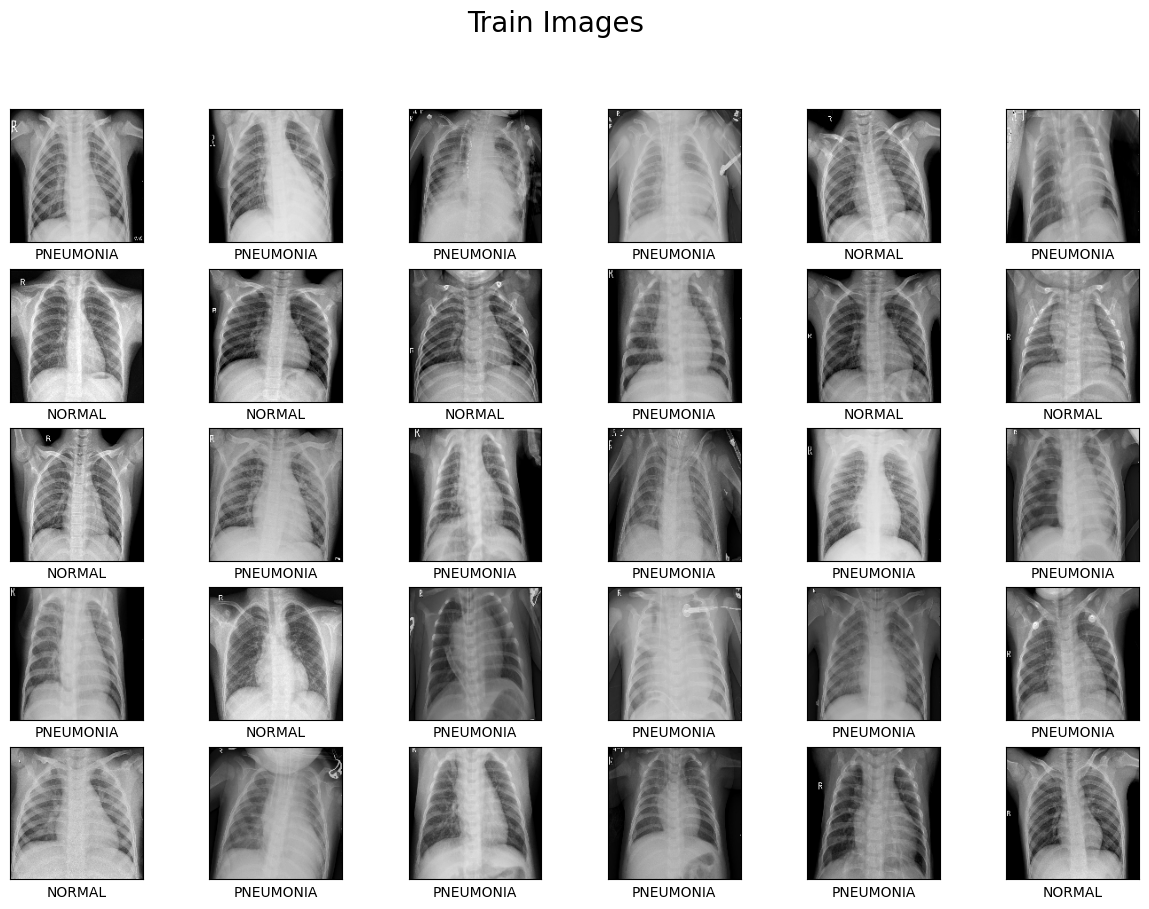

In [ ]:
# Set the size of the figure for displaying images
plt.figure(figsize=(15, 10))

# Set the main title for the subplot
plt.suptitle("Train Images", fontsize=20)

# Loop through the first 30 images in the training set
for i in range(30):
    # Create subplots in a 5x6 grid, and select the i-th subplot
    plt.subplot(5, 6, i + 1)

    # Remove ticks and grids for better visualization
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the label as xlabel (class name) for the i-th image
    plt.xlabel(get_Label(train_labels[i]))

    # Display the i-th image in grayscale using a binary colormap
    plt.imshow(train_images[i], cmap=plt.cm.binary)


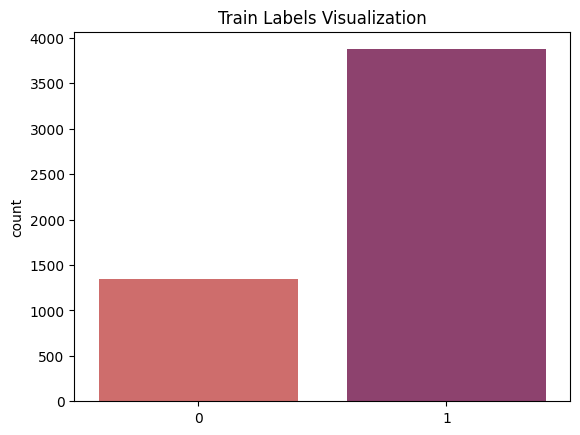

In [ ]:
# Set the title for the plot
plt.title('Train Labels Visualization')

# Create a countplot of the training labels using seaborn
sns.countplot(x=train_labels, palette='flare')


plt.show()


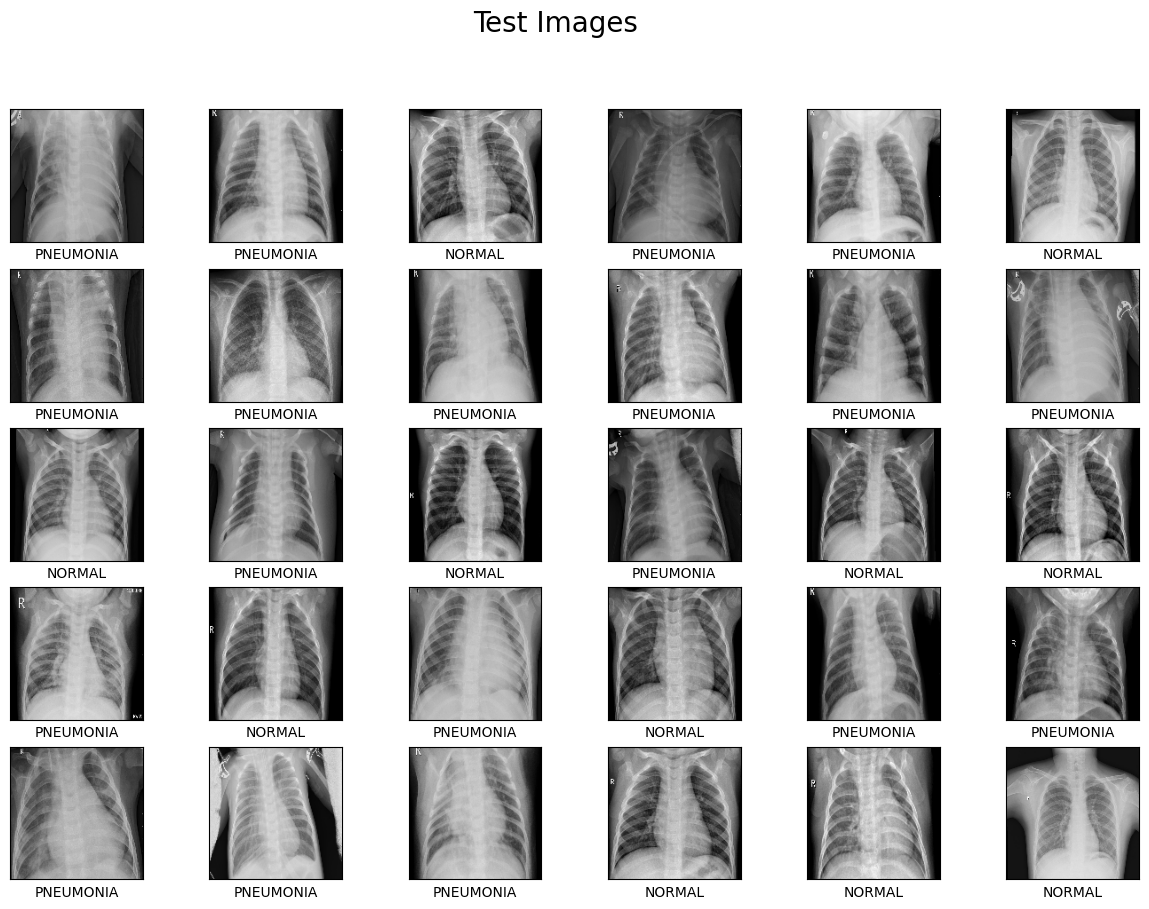

In [ ]:
# Set the size of the figure for displaying images
plt.figure(figsize=(15, 10))

# Set the main title for the subplot
plt.suptitle("Test Images", fontsize=20)

# Loop through the first 30 images in the test set
for i in range(30):
    # Create subplots in a 5x6 grid, and select the i-th subplot
    plt.subplot(5, 6, i + 1)

    # Remove ticks and grids for better visualization
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the label as xlabel (class name) for the i-th image
    plt.xlabel(get_Label(test_labels[i]))

    # Display the i-th image in grayscale using a binary colormap
    plt.imshow(test_images[i], cmap=plt.cm.binary)


In [ ]:
# Convert training labels to categorical using one-hot encoding
train_labels = to_categorical(train_labels, 2)

# Convert test labels to categorical using one-hot encoding
test_labels = to_categorical(test_labels, 2)


### 7. Data Augmentation
Data augmentation is applied to the training images using ImageDataGenerator to increase the diversity of the training set and improve the model's generalization.



In [ ]:
# Set the batch size for training
batch_size = 16

# Create an image generator for data augmentation during training
image_gen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
)

# Create Image Data Generator for Test Set
test_data_gen = ImageDataGenerator()

# Create Image Data Generator for Validation Set
val_data_gen = ImageDataGenerator()

# Create a flow of augmented images and labels for training set
train = image_gen.flow(
    train_images,
    train_labels,
    shuffle=True,  # Shuffle the data after each epoch
    batch_size=batch_size  # Set the batch size
)

# Create a flow of images and labels for the test set
test = test_data_gen.flow(
    test_images,
    test_labels,
    shuffle=True,  # Shuffle the data
    batch_size=batch_size  # Set the batch size
)


### 8. Building the CNN Model

A Convolutional Neural Network (CNN) is constructed using Keras' Sequential API.\
The model consists of multiple convolutional layers followed by pooling layers, and dense layers to perform classification.


In [ ]:

cnn_model = models.Sequential()

# Add a convolutional layer with 300 filters, a kernel size of (5,5), L2 regularization, and ReLU activation
cnn_model.add(layers.Conv2D(300, (5, 5), kernel_regularizer=l2(0.00005), padding='same', activation='relu', input_shape=(150, 150, 3)))

# Add Batch Normalization layer to normalize the activations of the convolutional layer
cnn_model.add(BatchNormalization())

# Add a max-pooling layer with a pool size of (2,2)
cnn_model.add(layers.MaxPooling2D(2, 2))

# Add another convolutional layer with 200 filters, a kernel size of (3,3), L2 regularization, and ReLU activation
cnn_model.add(layers.Conv2D(200, (3, 3), kernel_regularizer=l2(0.00005), padding='same', activation='relu'))

# Add Batch Normalization layer
cnn_model.add(BatchNormalization())

# Add Dropout layer with a dropout rate of 0.2 to reduce overfitting
cnn_model.add(Dropout(0.2))

# Add another max-pooling layer
cnn_model.add(layers.MaxPooling2D(2, 2))

# Add another convolutional layer with 100 filters, a kernel size of (3,3), L2 regularization, and ReLU activation
cnn_model.add(layers.Conv2D(100, (3, 3), kernel_regularizer=l2(0.00005), padding='same', activation='relu'))

# Add Batch Normalization layer
cnn_model.add(BatchNormalization())

# Add another max-pooling layer
cnn_model.add(layers.MaxPooling2D(2, 2))

# Add another convolutional layer with 64 filters, a kernel size of (3,3), L2 regularization, and ReLU activation
cnn_model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.00005), padding='same', activation='relu'))

# Add Batch Normalization layer
cnn_model.add(BatchNormalization())

# Add Dropout layer with a dropout rate of 0.2
cnn_model.add(Dropout(0.2))

# Add another max-pooling layer
cnn_model.add(layers.MaxPooling2D(2, 2))


In [ ]:
# Flatten the output of the last convolutional layer
cnn_model.add(layers.Flatten())

# Add a dense (fully connected) layer with 100 units and ReLU activation
cnn_model.add(layers.Dense(100, activation='relu'))

# Add Batch Normalization layer
cnn_model.add(BatchNormalization())

# Add another dense layer with 64 units and ReLU activation
cnn_model.add(layers.Dense(64, activation='relu'))

# Add Batch Normalization layer
cnn_model.add(BatchNormalization())

# Add Dropout layer with a dropout rate of 0.3
cnn_model.add(Dropout(0.3))

# Add the output layer with 2 units (binary classification) and sigmoid activation
cnn_model.add(layers.Dense(2, activation='sigmoid'))

# Display a summary of the model architecture
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 300)     22800     
                                                                 
 batch_normalization (Batch  (None, 150, 150, 300)     1200      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 300)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 200)       540200    
                                                                 
 batch_normalization_1 (Bat  (None, 75, 75, 200)       800       
 chNormalization)                                                
                                                        

In [ ]:
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'],)

In [ ]:
# Import necessary callbacks from Keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# EarlyStopping callback
early = EarlyStopping(
    monitor="loss",  # Monitors the training loss
    mode="min",  # Minimizes the monitored quantity
    min_delta=0,  # Minimum change to qualify as an improvement
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,  # Controls the verbosity (1: update messages)
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# ReduceLROnPlateau callback
learning_rate_reduction = ReduceLROnPlateau(
    monitor='loss',  # Monitors the training loss
    patience=2,  # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,  # Controls the verbosity (1: update messages)
    factor=0.3,  # Factor by which the learning rate will be reduced
    min_lr=0.000001  # Lower bound on the learning rate
)

# Combine the callbacks into a list
callbacks_list = [early, learning_rate_reduction]


In [ ]:
# Define the number of training samples
n_training_samples = len(train)

# Define the number of validation samples
n_validation_samples = len(test)

print("Training Samples: ",n_training_samples,"\nValidation Samples: ",n_validation_samples)



Training Samples:  326 
Validation Samples:  39


### 9. Training the Model
The CNN model is trained on the augmented training data, with validation data used to monitor its performance.


In [ ]:

# Train the model using the fit method
history = cnn_model.fit(
    train,  # Training data generator
    epochs=40,  # Number of epochs (complete passes through the entire dataset)
    validation_data=test,  # Validation data generator
    validation_steps=n_validation_samples // batch_size,  # Number of validation steps per epoch
    shuffle=True,  # Shuffle the training data at the beginning of each epoch
    callbacks=callbacks_list  # List of callbacks to apply during training
)


Epoch 1/40
326/326 [==============================] - 80s 199ms/step - loss: 0.4771 - accuracy: 0.8014 - val_loss: 1.6131 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 2/40
326/326 [==============================] - 64s 195ms/step - loss: 0.3242 - accuracy: 0.8788 - val_loss: 2.9536 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 3/40
326/326 [==============================] - 62s 191ms/step - loss: 0.2797 - accuracy: 0.8961 - val_loss: 2.0487 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/40
326/326 [==============================] - 62s 189ms/step - loss: 0.2877 - accuracy: 0.8892 - val_loss: 1.4467 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/40
326/326 [==============================] - 62s 189ms/step - loss: 0.2575 - accuracy: 0.9032 - val_loss: 3.1650 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 6/40
326/326 [==============================] - 62s 191ms/step - loss: 0.2426 - accuracy: 0.9114 - val_loss: 1.2770 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 7/40
326/326 [==============================] 

### 10. Evaluating the Model
Evaluate the trained model on the test set to check its performance on unseen data.\
Accuracy, confusion matrix, and classification report are generated to assess the model.


In [ ]:
# Evaluate the model on the test data
score, acc = cnn_model.evaluate(test, batch_size=batch_size)

# Print the test score
print('Test score:', score)

# Print the test accuracy
print('Test accuracy:', acc)


39/39 [==============================] - 1s 30ms/step - loss: 0.5847 - accuracy: 0.8317
Test score: 0.5847491025924683
Test accuracy: 0.8317307829856873


In [ ]:
# Make predictions using the trained CNN model on the test images
cnn_prediction = cnn_model.predict(test_images)


20/20 [==============================] - 1s 54ms/step


### 11. Visualizing Predictions

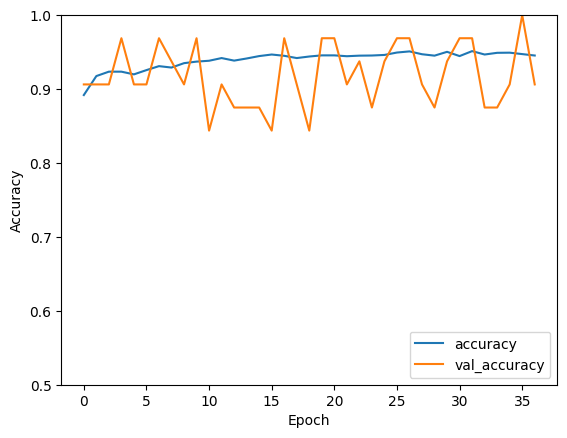

In [ ]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='val_accuracy')  # Plot validation accuracy
plt.xlabel('Epoch')  # Label for the x-axis representing epochs
plt.ylabel('Accuracy')  # Label for the y-axis representing accuracy
plt.ylim([0.5, 1])  # Set the y-axis limit to ensure a reasonable scale
plt.legend(loc='lower right')  # Display legend in the lower-right corner
plt.show()  # Display the plot


In [ ]:
# Assuming cnn_prediction, test_labels, y_test, y_pred are defined

# Get analysis
y_pred = np.argmax(cnn_prediction, axis=1)  # Get predicted class labels by finding the index of the maximum predicted probability
y_test = np.argmax(test_labels, axis=1)  # Get true class labels from one-hot encoded test labels


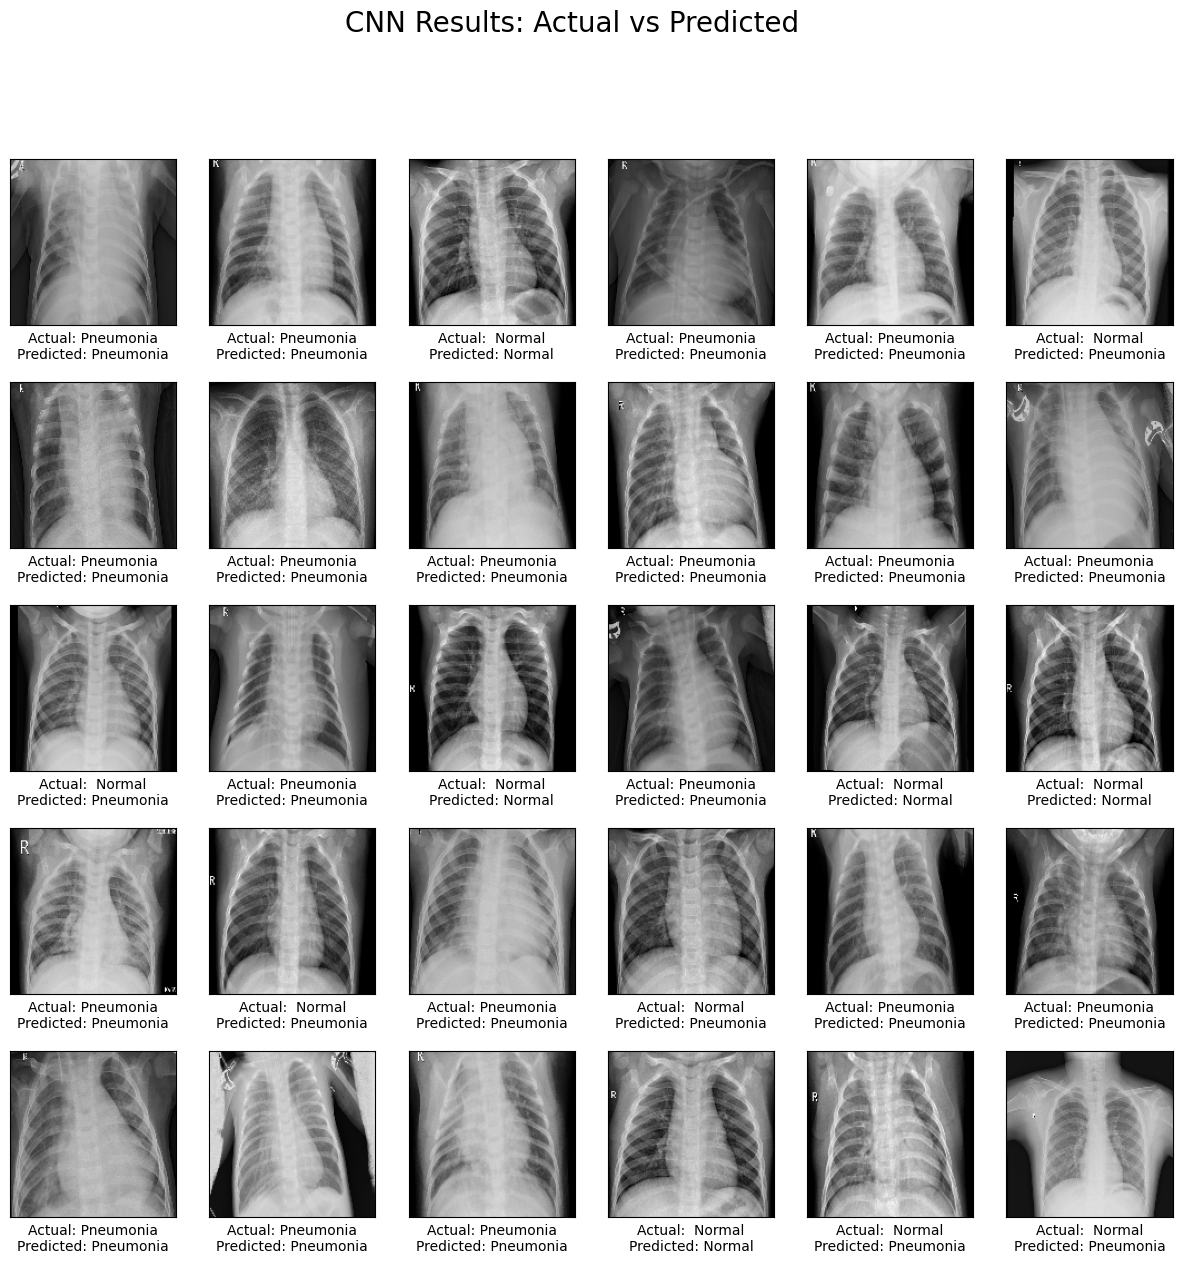

In [ ]:
# Set the size of the figure for displaying images
plt.figure(figsize=(15, 14))

# Set the main title for the subplot
plt.suptitle("CNN Results: Actual vs Predicted", fontsize=20)

# Loop through the first 30 images in the test set
for i in range(30):
    # Create subplots in a 5x6 grid, and select the i-th subplot
    plt.subplot(5, 6, i + 1)

    # Remove ticks and grids for better visualization
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the label as xlabel (class name) for the i-th image
    labl = "Actual: "
    if y_test[i] == 0:
      labl+=" Normal\nPredicted: "
      if y_pred[i] == 0:
        labl+="Normal"
      else:
        labl+="Pneumonia"
    else:
      labl+= "Pneumonia\nPredicted: "
      if y_pred[i] == 0:
        labl+="Normal"
      else:
        labl+="Pneumonia"



    plt.xlabel(labl)

    # Display the i-th image in grayscale using a binary colormap
    plt.imshow(test_images[i], cmap=plt.cm.binary)

In [ ]:

# Calculate metrics
f1 = f1_score(y_test, y_pred, average="macro")  # Calculate F1 score
recall = recall_score(y_test, y_pred, average="macro")  # Calculate recall
precision = precision_score(y_test, y_pred, average="macro")  # Calculate precision
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

# Print metrics
print('F1 Score:', f1)  # Print F1 score
print('Recall:', recall)  # Print recall
print('Precision:', precision)  # Print precision
print('Accuracy:', accuracy)  # Print accuracy


F1 Score: 0.7967079849206473
Recall: 0.7764957264957265
Precision: 0.8907065326788783
Accuracy: 0.8317307692307693


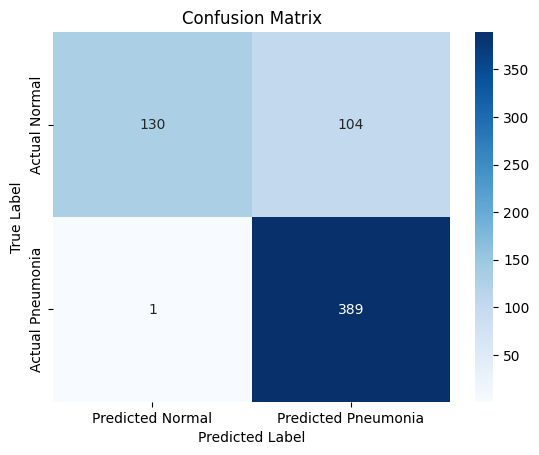

In [ ]:
# Assuming y_test and y_pred are defined

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix with labeled rows and columns
cm_df = pd.DataFrame(data=cm, index=["Actual Normal", "Actual Pneumonia"],
                     columns=["Predicted Normal", "Predicted Pneumonia"])

# Set the color map to blue
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")

# Add labels and title to the heatmap
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.56      0.71       234
           1       0.79      1.00      0.88       390

    accuracy                           0.83       624
   macro avg       0.89      0.78      0.80       624
weighted avg       0.87      0.83      0.82       624



### 12. Building the VGG16 Model

In [ ]:
# Import VGG16 model with pre-trained weights from ImageNet
vgg_base_model = VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)

# Display the summary of the VGG16 base model
vgg_base_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
#freezing layers
freezing_layers(vgg_base_model)

In [ ]:
# Create a Sequential model
vgg_model = Sequential()

# Add the VGG16 base model to the Sequential model
vgg_model.add(vgg_base_model)

# Flatten the output of the VGG16 base model
vgg_model.add(layers.Flatten())

# Add a Dense layer with 2048 units and ReLU activation
vgg_model.add(layers.Dense(2048, activation='relu'))

# Add Batch Normalization to the Dense layer
vgg_model.add(BatchNormalization())

# Add Dropout with a dropout rate of 0.5
vgg_model.add(Dropout(0.5))

# Add the final Dense layer with 2 units and sigmoid activation for binary classification
vgg_model.add(layers.Dense(2, activation='sigmoid'))

# Display the summary of the VGG16-based model
vgg_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 2048)              16779264  
                                                                 
 batch_normalization_7 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 2)                 4098      
                                                      

In [ ]:
vgg_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'],)

In [ ]:
# Calculate the number of samples in the training and validation datasets
n_training_samples = len(train)
n_validation_samples = len(test)

# Train the VGG16-based model
history = vgg_model.fit(
    train,
    epochs=40,
    validation_data=test,
    validation_steps=n_validation_samples // batch_size,
    # steps_per_epoch=n_training_samples // batch_size,
    shuffle=True,
    callbacks=callbacks_list
)


Epoch 1/40
326/326 [==============================] - 39s 109ms/step - loss: 0.3260 - accuracy: 0.8919 - val_loss: 0.2867 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 2/40
326/326 [==============================] - 34s 104ms/step - loss: 0.2180 - accuracy: 0.9176 - val_loss: 0.6137 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 3/40
326/326 [==============================] - 35s 107ms/step - loss: 0.2020 - accuracy: 0.9235 - val_loss: 0.5238 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 4/40
326/326 [==============================] - 36s 111ms/step - loss: 0.1972 - accuracy: 0.9235 - val_loss: 0.1341 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 5/40
326/326 [==============================] - 35s 107ms/step - loss: 0.2012 - accuracy: 0.9199 - val_loss: 0.2903 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 6/40
326/326 [==============================] - 34s 104ms/step - loss: 0.1884 - accuracy: 0.9256 - val_loss: 0.4423 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 7/40
326/326 [==============================] 

In [ ]:
predict = vgg_model.predict(test)

39/39 [==============================] - 2s 35ms/step


In [ ]:
score, acc = vgg_model.evaluate(test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

39/39 [==============================] - 1s 37ms/step - loss: 0.2308 - accuracy: 0.9215
Test score: 0.23084156215190887
Test accuracy: 0.9214743375778198


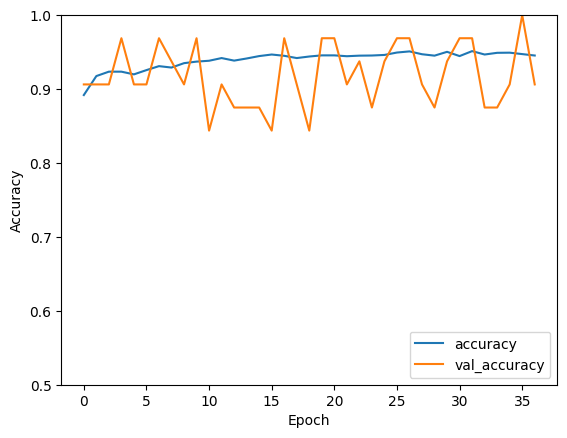

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Assuming vgg_model, test, test_labels are defined

# Make predictions
predict = vgg_model.predict(test)
y_pred = np.argmax(predict, axis=1)
y_test = np.argmax(test_labels, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")
accuracy = accuracy_score(y_test, y_pred)

# Print metrics
print('F1 Score:', f1)
print('Recall:', recall)
print('Precision:', precision)
print('Accuracy:', accuracy)


39/39 [==============================] - 1s 36ms/step
F1 Score: 0.48302158883657803
Recall: 0.485042735042735
Precision: 0.4839455206238312
Accuracy: 0.530448717948718


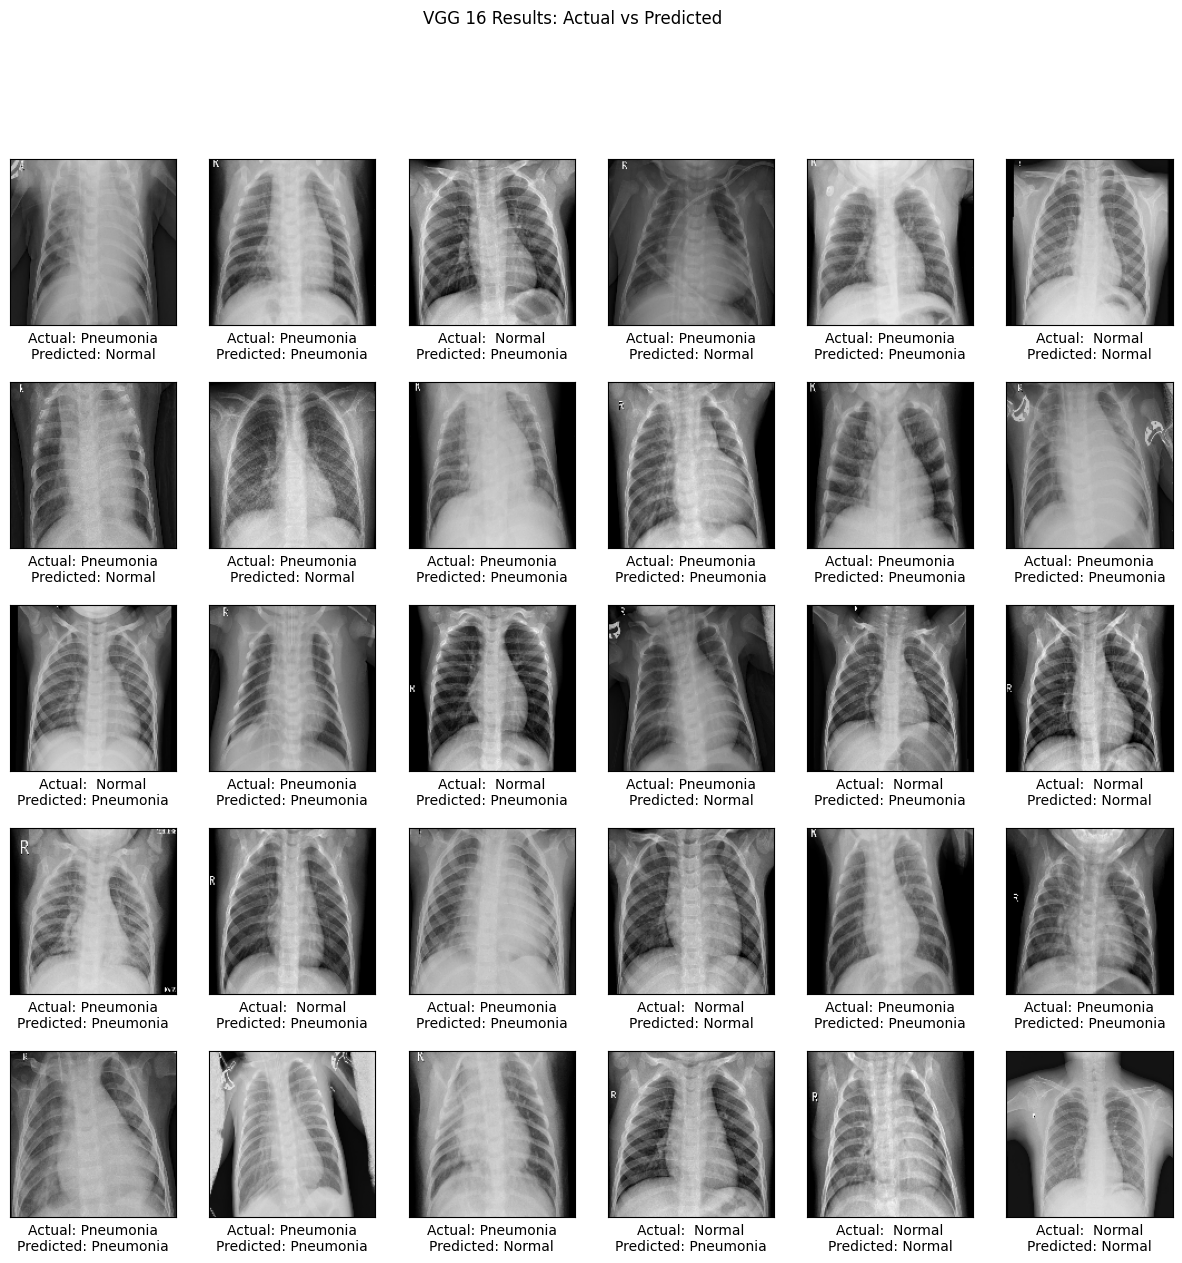

In [ ]:
# Set the size of the figure for displaying images
plt.figure(figsize=(15, 14))

# Set the main title for the subplot
plt.suptitle("VGG 16 Results: Actual vs Predicted", fontsize=12)

# Loop through the first 30 images in the test set
for i in range(30):
    # Create subplots in a 5x6 grid, and select the i-th subplot
    plt.subplot(5, 6, i + 1)

    # Remove ticks and grids for better visualization
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the label as xlabel (class name) for the i-th image
    labl = "Actual: "
    if y_test[i] == 0:
      labl+=" Normal\nPredicted: "
      if y_pred[i] == 0:
        labl+="Normal"
      else:
        labl+="Pneumonia"
    else:
      labl+= "Pneumonia\nPredicted: "
      if y_pred[i] == 0:
        labl+="Normal"
      else:
        labl+="Pneumonia"



    plt.xlabel(labl)

    # Display the i-th image in grayscale using a binary colormap
    plt.imshow(test_images[i], cmap=plt.cm.binary)

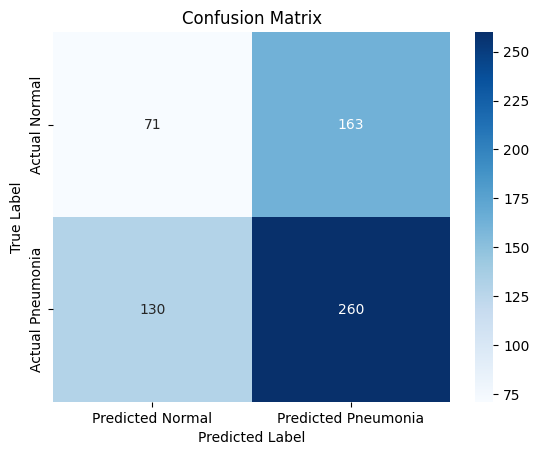

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(data=cm, index=["Actual Normal", "Actual Pneumonia"],
                     columns=["Predicted Normal", "Predicted Pneumonia"])

# Set the color map to green
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.30      0.33       234
           1       0.61      0.67      0.64       390

    accuracy                           0.53       624
   macro avg       0.48      0.49      0.48       624
weighted avg       0.52      0.53      0.52       624



### 13. Building the VGG19 Model

In [ ]:
from tensorflow.keras.applications import VGG19

# Import VGG16 model with pre-trained weights from ImageNet
vgg_base_model = VGG19(input_shape=(150,150,3), weights='imagenet', include_top=False)

# Display the summary of the VGG19 base model
vgg_base_model.summary()



80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
#remove any dense layer from model
freezing_layers(vgg_model)

In [ ]:
# Create a Sequential model
vgg_model = Sequential()

# Add the VGG16 base model to the Sequential model
vgg_model.add(vgg_base_model)

# Flatten the output of the VGG16 base model
vgg_model.add(layers.Flatten())

# Add a Dense layer with 2048 units and ReLU activation
vgg_model.add(layers.Dense(2048, activation='relu'))

# Add Batch Normalization to the Dense layer
vgg_model.add(BatchNormalization())

# Add Dropout with a dropout rate of 0.5
vgg_model.add(Dropout(0.5))

# Add the final Dense layer with 2 units and sigmoid activation for binary classification
vgg_model.add(layers.Dense(2, activation='sigmoid'))

# Display the summary of the VGG16-based model
vgg_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_7 (Dense)             (None, 2048)              16779264  
                                                                 
 batch_normalization_8 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 2)                 4098      
                                                      

In [ ]:
vgg_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'],)

In [ ]:
# Calculate the number of samples in the training and validation datasets
n_training_samples = len(train)
n_validation_samples = len(test)

# Train the VGG16-based model
history = vgg_model.fit(
    train,
    epochs=40,
    validation_data=test,
    validation_steps=n_validation_samples // batch_size,
    # steps_per_epoch=n_training_samples // batch_size,
    shuffle=True,
    callbacks=callbacks_list
)


Epoch 1/40
326/326 [==============================] - 45s 130ms/step - loss: 0.3392 - accuracy: 0.8890 - val_loss: 0.8949 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/40
326/326 [==============================] - 39s 120ms/step - loss: 0.2245 - accuracy: 0.9139 - val_loss: 0.7812 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 3/40
326/326 [==============================] - 47s 144ms/step - loss: 0.2064 - accuracy: 0.9214 - val_loss: 0.2859 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 4/40
326/326 [==============================] - 36s 112ms/step - loss: 0.2007 - accuracy: 0.9245 - val_loss: 0.2168 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 5/40
326/326 [==============================] - 37s 114ms/step - loss: 0.1841 - accuracy: 0.9306 - val_loss: 0.5154 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 6/40
326/326 [==============================] - 35s 107ms/step - loss: 0.1921 - accuracy: 0.9275 - val_loss: 0.6179 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/40
326/326 [==============================] 

In [ ]:
predict = vgg_model.predict(test)

39/39 [==============================] - 2s 35ms/step


In [ ]:
score, acc = vgg_model.evaluate(test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

39/39 [==============================] - 1s 37ms/step - loss: 0.2183 - accuracy: 0.9231
Test score: 0.21826304495334625
Test accuracy: 0.9230769276618958


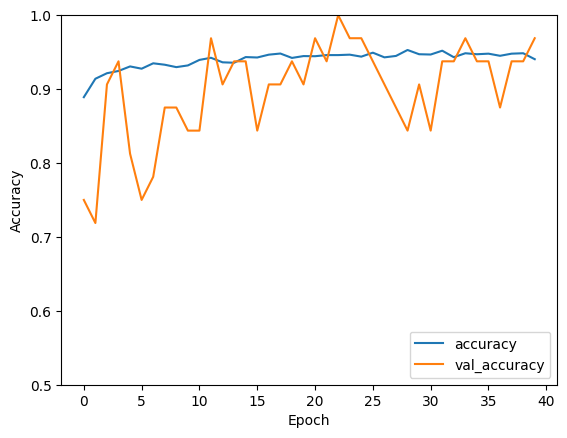

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Assuming vgg_model, test, test_labels are defined

# Make predictions
predict = vgg_model.predict(test)
y_pred = np.argmax(predict, axis=1)
y_test = np.argmax(test_labels, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")
accuracy = accuracy_score(y_test, y_pred)

# Print metrics
print('F1 Score:', f1)
print('Recall:', recall)
print('Precision:', precision)
print('Accuracy:', accuracy)


39/39 [==============================] - 1s 37ms/step
F1 Score: 0.48503868048460086
Recall: 0.4863247863247863
Precision: 0.48557692307692313
Accuracy: 0.5288461538461539


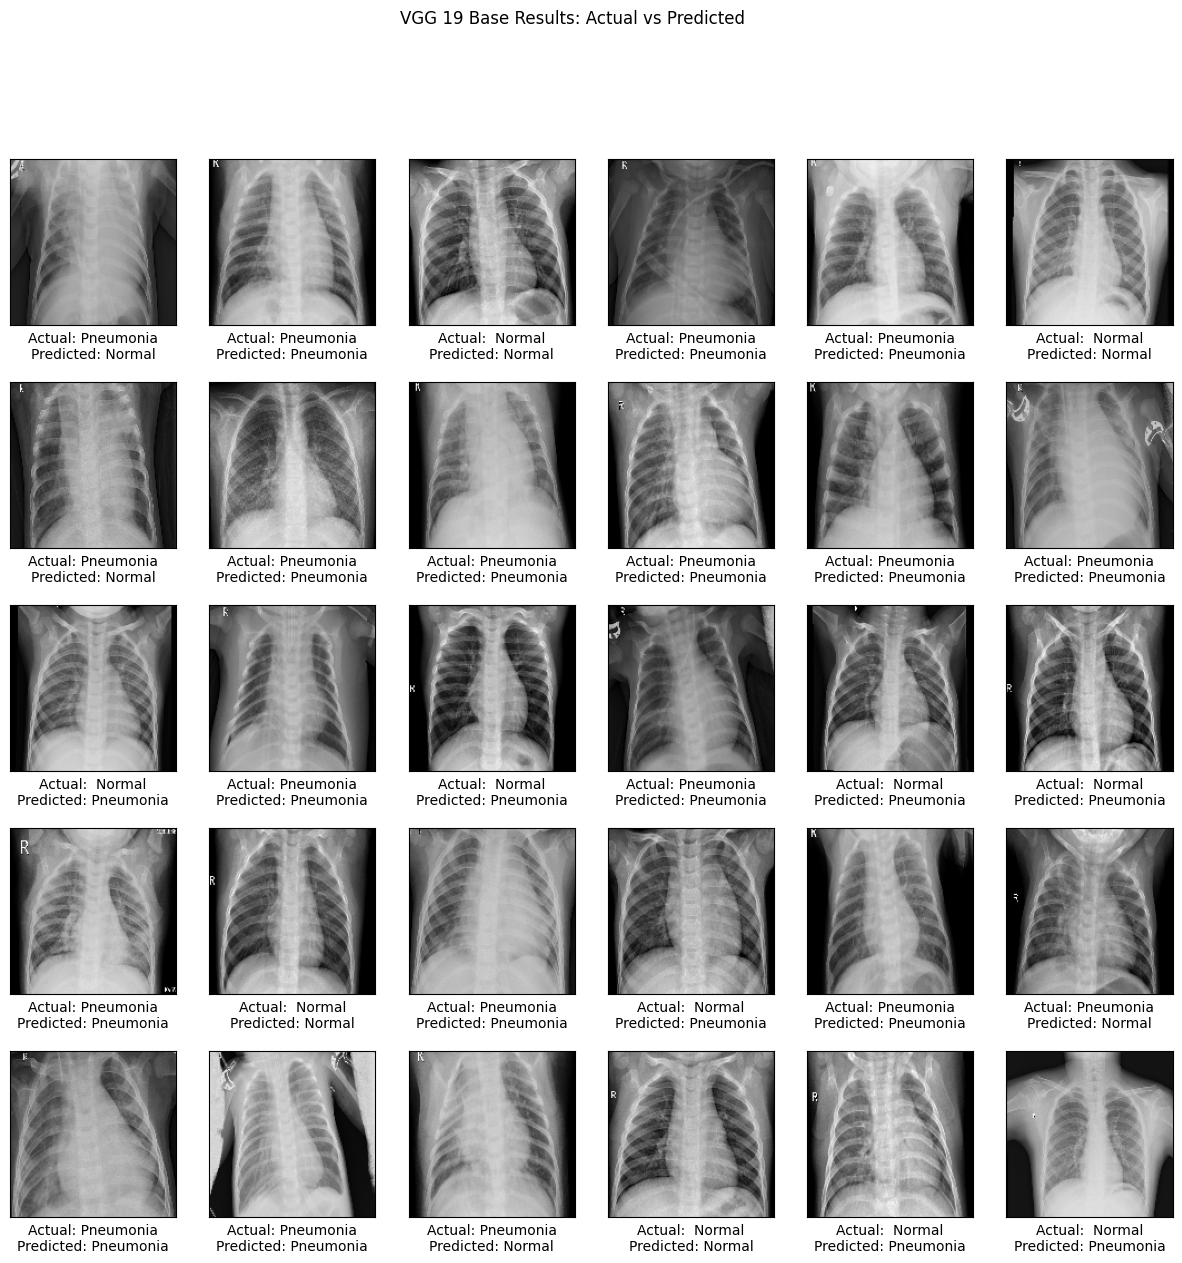

In [ ]:
# Set the size of the figure for displaying images
plt.figure(figsize=(15, 14))

# Set the main title for the subplot
plt.suptitle("VGG 19 Base Results: Actual vs Predicted", fontsize=12)

# Loop through the first 30 images in the test set
for i in range(30):
    # Create subplots in a 5x6 grid, and select the i-th subplot
    plt.subplot(5, 6, i + 1)

    # Remove ticks and grids for better visualization
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the label as xlabel (class name) for the i-th image
    labl = "Actual: "
    if y_test[i] == 0:
      labl+=" Normal\nPredicted: "
      if y_pred[i] == 0:
        labl+="Normal"
      else:
        labl+="Pneumonia"
    else:
      labl+= "Pneumonia\nPredicted: "
      if y_pred[i] == 0:
        labl+="Normal"
      else:
        labl+="Pneumonia"



    plt.xlabel(labl)

    # Display the i-th image in grayscale using a binary colormap
    plt.imshow(test_images[i], cmap=plt.cm.binary)

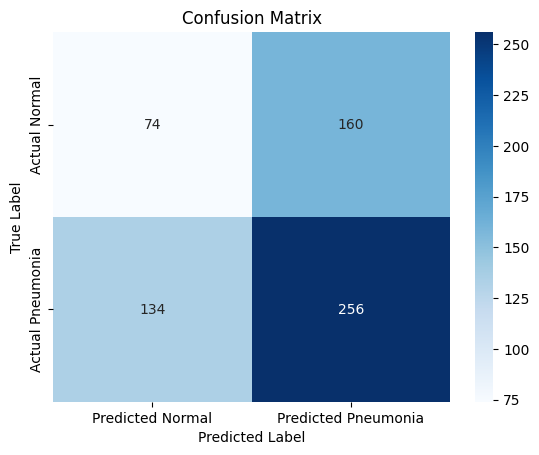

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(data=cm, index=["Actual Normal", "Actual Pneumonia"],
                     columns=["Predicted Normal", "Predicted Pneumonia"])

# Set the color map to green
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.32      0.33       234
           1       0.62      0.66      0.64       390

    accuracy                           0.53       624
   macro avg       0.49      0.49      0.49       624
weighted avg       0.52      0.53      0.52       624



### 14. Building the DenseNet121 Model

In [ ]:
from tensorflow.keras.applications import DenseNet121

DenseNet121_base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(150, 150, 3))


In [ ]:
#remove any dense layer from model
freezing_layers(DenseNet121_base_model)

In [ ]:
DenseNet121_model = Sequential()
DenseNet121_model.add(DenseNet121_base_model)
DenseNet121_model.add(layers.Flatten())
DenseNet121_model.add(layers.Dense(1024 ,activation='relu'))
DenseNet121_model.add(BatchNormalization())
DenseNet121_model.add(Dropout(0.5))
DenseNet121_model.add(layers.Dense(2, activation ='sigmoid'))
DenseNet121_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_5 (Flatten)         (None, 16384)             0         
                                                                 
 dense_11 (Dense)            (None, 1024)              16778240  
                                                                 
 batch_normalization_10 (Ba  (None, 1024)              4096      
 tchNormalization)                                               
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 2)                 2050      
                                                      

In [ ]:
DenseNet121_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Calculate the number of samples in the training and validation datasets
n_training_samples = len(train)
n_validation_samples = len(test)

# Train the DenseNet121_model -based model
history = DenseNet121_model.fit(
    train,
    epochs=40,
    validation_data=test,
    validation_steps=n_validation_samples // batch_size,
    # steps_per_epoch=n_training_samples // batch_size,
    shuffle=True,
    callbacks=callbacks_list
)


Epoch 1/40
326/326 [==============================] - 59s 143ms/step - loss: 0.3076 - accuracy: 0.8896 - val_loss: 0.4557 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 2/40
326/326 [==============================] - 38s 116ms/step - loss: 0.2150 - accuracy: 0.9155 - val_loss: 0.1518 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 3/40
326/326 [==============================] - 38s 116ms/step - loss: 0.1975 - accuracy: 0.9218 - val_loss: 0.1291 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 4/40
326/326 [==============================] - 36s 111ms/step - loss: 0.1833 - accuracy: 0.9316 - val_loss: 0.3659 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/40
326/326 [==============================] - 39s 119ms/step - loss: 0.1856 - accuracy: 0.9243 - val_loss: 0.0921 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 6/40
326/326 [==============================] - 36s 110ms/step - loss: 0.1829 - accuracy: 0.9298 - val_loss: 0.1760 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 7/40
326/326 [==============================] 

In [ ]:
score, acc = DenseNet121_model.evaluate(test,batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

39/39 [==============================] - 1s 31ms/step - loss: 0.2391 - accuracy: 0.9119
Test score: 0.23905865848064423
Test accuracy: 0.9118589758872986


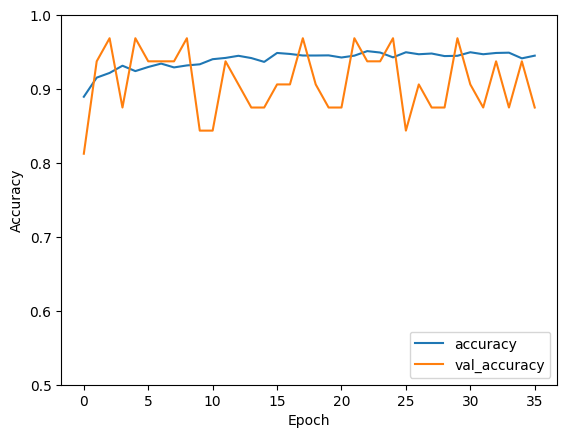

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Assuming excmodel, test, test_labels are defined

# Make predictions
predict = DenseNet121_model.predict(test)
y_pred = np.argmax(predict, axis=1)
y_test = np.argmax(test_labels, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")
accuracy = accuracy_score(y_test, y_pred)

# Print metrics
print('F1 Score:', f1)
print('Recall:', recall)
print('Precision:', precision)
print('Accuracy:', accuracy)


39/39 [==============================] - 3s 29ms/step
F1 Score: 0.5284784832571779
Recall: 0.5286324786324786
Precision: 0.5283975438787154
Accuracy: 0.5560897435897436


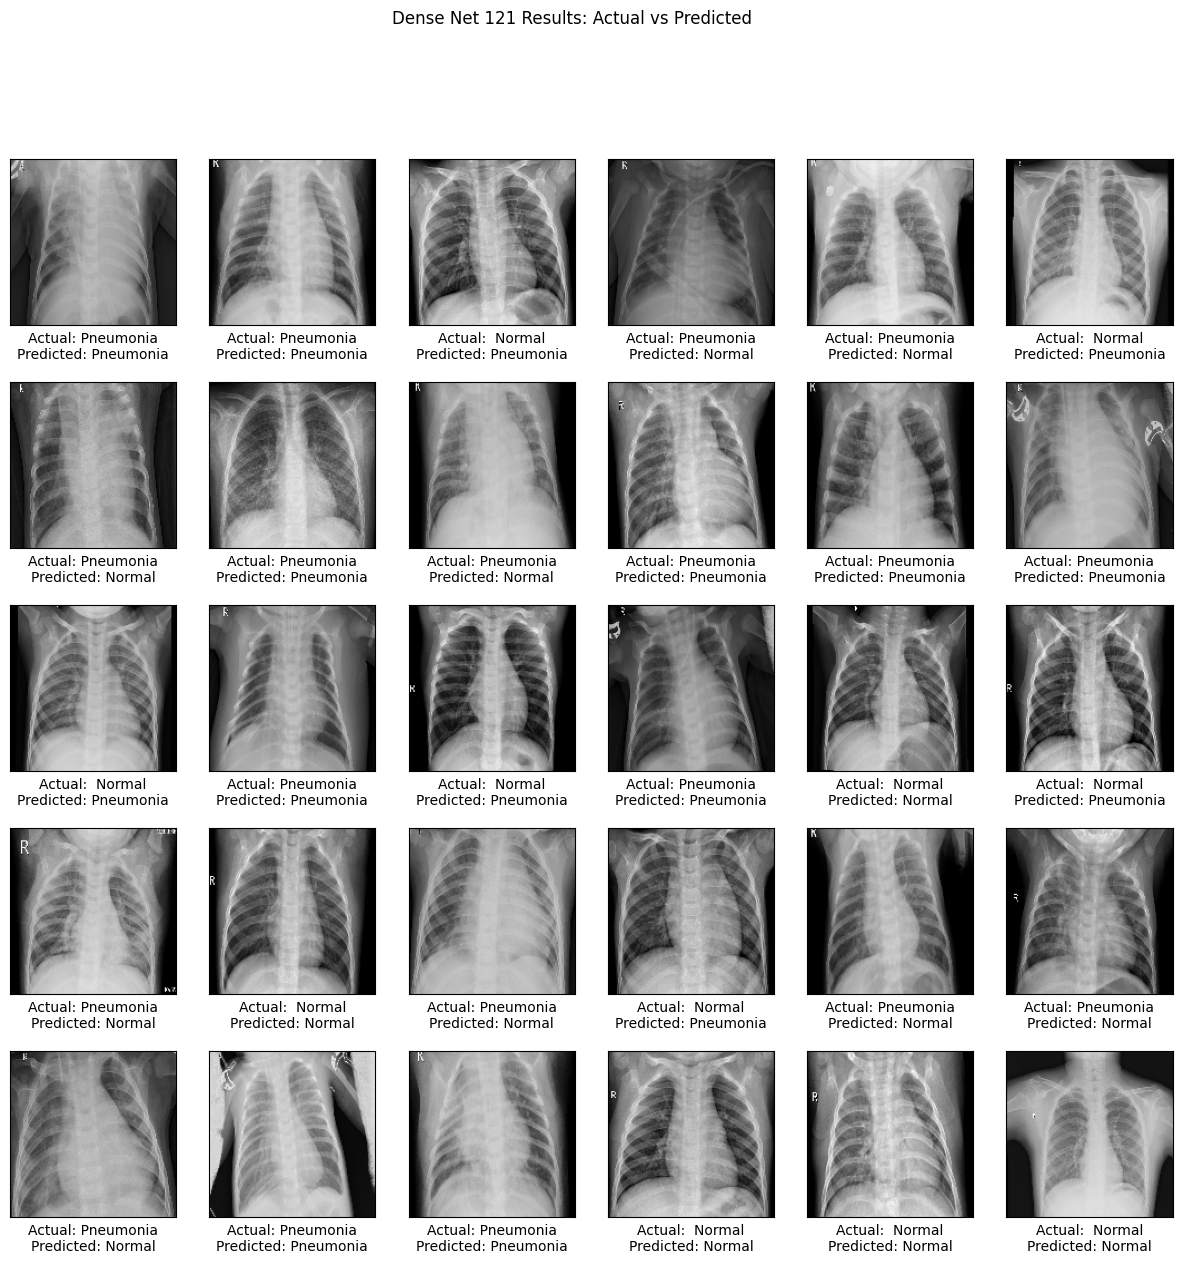

In [ ]:
# Set the size of the figure for displaying images
plt.figure(figsize=(15, 14))

# Set the main title for the subplot
plt.suptitle("Dense Net 121 Results: Actual vs Predicted", fontsize=12)

# Loop through the first 30 images in the test set
for i in range(30):
    # Create subplots in a 5x6 grid, and select the i-th subplot
    plt.subplot(5, 6, i + 1)

    # Remove ticks and grids for better visualization
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the label as xlabel (class name) for the i-th image
    labl = "Actual: "
    if y_test[i] == 0:
      labl+=" Normal\nPredicted: "
      if y_pred[i] == 0:
        labl+="Normal"
      else:
        labl+="Pneumonia"
    else:
      labl+= "Pneumonia\nPredicted: "
      if y_pred[i] == 0:
        labl+="Normal"
      else:
        labl+="Pneumonia"



    plt.xlabel(labl)

    # Display the i-th image in grayscale using a binary colormap
    plt.imshow(test_images[i], cmap=plt.cm.binary)

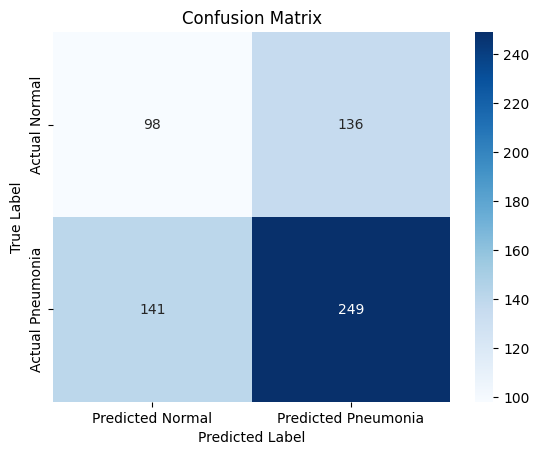

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(data=cm, index=["Actual Normal", "Actual Pneumonia"],
                     columns=["Predicted Normal", "Predicted Pneumonia"])

# Set the color map to green
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.42      0.41       234
           1       0.65      0.64      0.64       390

    accuracy                           0.56       624
   macro avg       0.53      0.53      0.53       624
weighted avg       0.56      0.56      0.56       624



### 8. Building the DenseNet169 Model

In [ ]:
from tensorflow.keras.applications import DenseNet169

DenseNet169_base_model = DenseNet169(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

51877672/51877672 [==============================] - 1s 0us/step


In [ ]:
#remove any dense layer from model
freezing_layers(DenseNet169_base_model)

In [ ]:
DenseNet169_model = Sequential()
DenseNet169_model .add(DenseNet169_base_model)
DenseNet169_model .add(layers.Flatten())
DenseNet169_model .add(layers.Dense(1024 ,activation='relu'))
DenseNet169_model .add(BatchNormalization())
DenseNet169_model .add(Dropout(0.5))
DenseNet169_model .add(layers.Dense(2, activation ='sigmoid'))
DenseNet169_model .summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 4, 4, 1664)        12642880  
                                                                 
 flatten_6 (Flatten)         (None, 26624)             0         
                                                                 
 dense_13 (Dense)            (None, 1024)              27264000  
                                                                 
 batch_normalization_11 (Ba  (None, 1024)              4096      
 tchNormalization)                                               
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 2)                 2050      
                                                      

In [ ]:
DenseNet169_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Training model
n_training_samples = len(train)
n_validation_samples = len(test)
history = DenseNet169_model.fit(
    train,
    epochs=40,
    validation_data=test,
    validation_steps=n_validation_samples//batch_size,
    # steps_per_epoch =(n_training_samples//batch_size)*2,
    shuffle = True,
    callbacks=callbacks_list
    )

Epoch 1/40
326/326 [==============================] - 68s 162ms/step - loss: 0.2864 - accuracy: 0.8992 - val_loss: 0.3684 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/40
326/326 [==============================] - 40s 122ms/step - loss: 0.1902 - accuracy: 0.9277 - val_loss: 0.3597 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 3/40
326/326 [==============================] - 37s 115ms/step - loss: 0.1721 - accuracy: 0.9344 - val_loss: 0.1608 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 4/40
326/326 [==============================] - 39s 120ms/step - loss: 0.1699 - accuracy: 0.9390 - val_loss: 0.2323 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/40
326/326 [==============================] - 38s 117ms/step - loss: 0.1588 - accuracy: 0.9413 - val_loss: 0.4073 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 6/40
326/326 [==============================] - 39s 120ms/step - loss: 0.1466 - accuracy: 0.9415 - val_loss: 0.1169 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 7/40
326/326 [==============================] 

In [ ]:
score, acc = DenseNet169_model.evaluate(test,batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

39/39 [==============================] - 2s 39ms/step - loss: 0.2708 - accuracy: 0.9247
Test score: 0.2707965672016144
Test accuracy: 0.9246794581413269


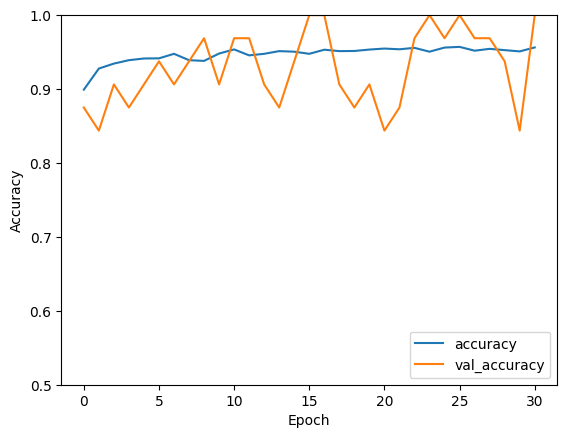

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Assuming excmodel, test, test_labels are defined

# Make predictions
predict = DenseNet169_model.predict(test)
y_pred = np.argmax(predict, axis=1)
y_test = np.argmax(test_labels, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
precision = precision_score(y_test, y_pred, average="macro")
accuracy = accuracy_score(y_test, y_pred)

# Print metrics
print('F1 Score:', f1)
print('Recall:', recall)
print('Precision:', precision)
print('Accuracy:', accuracy)


39/39 [==============================] - 10s 38ms/step
F1 Score: 0.5083100823016418
Recall: 0.5089743589743589
Precision: 0.5094425549086297
Accuracy: 0.5496794871794872


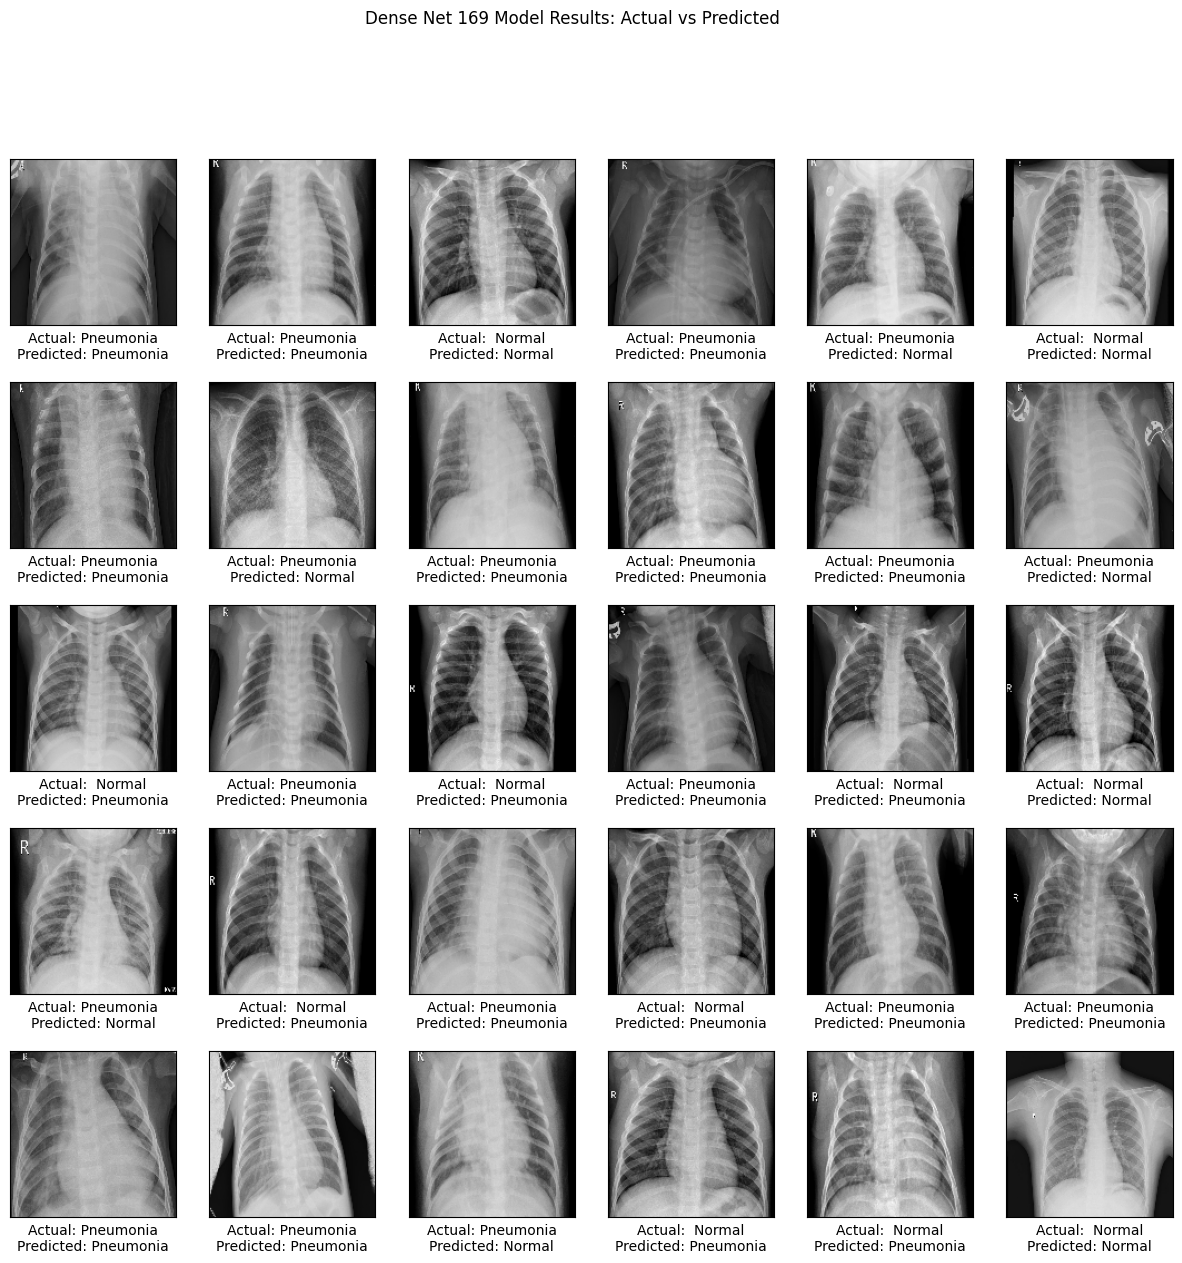

In [ ]:
# Set the size of the figure for displaying images
plt.figure(figsize=(15, 14))

# Set the main title for the subplot
plt.suptitle("Dense Net 169 Model Results: Actual vs Predicted", fontsize=12)

# Loop through the first 30 images in the test set
for i in range(30):
    # Create subplots in a 5x6 grid, and select the i-th subplot
    plt.subplot(5, 6, i + 1)

    # Remove ticks and grids for better visualization
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the label as xlabel (class name) for the i-th image
    labl = "Actual: "
    if y_test[i] == 0:
      labl+=" Normal\nPredicted: "
      if y_pred[i] == 0:
        labl+="Normal"
      else:
        labl+="Pneumonia"
    else:
      labl+= "Pneumonia\nPredicted: "
      if y_pred[i] == 0:
        labl+="Normal"
      else:
        labl+="Pneumonia"



    plt.xlabel(labl)

    # Display the i-th image in grayscale using a binary colormap
    plt.imshow(test_images[i], cmap=plt.cm.binary)

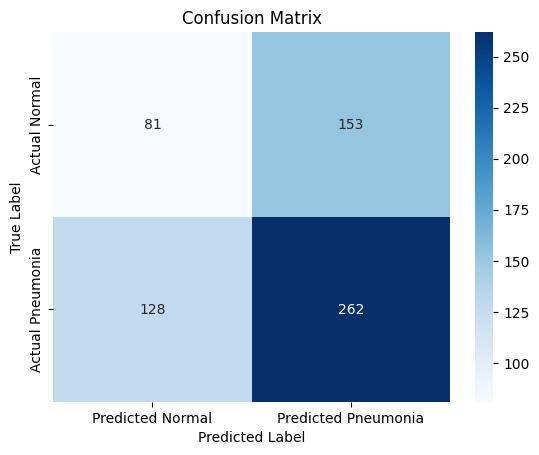

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(data=cm, index=["Actual Normal", "Actual Pneumonia"],
                     columns=["Predicted Normal", "Predicted Pneumonia"])

# Set the color map to green
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()



In [ ]:
print(classification_report(y_test, y_pred))